In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("cs1090b_hw1.ipynb")

# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> Data Science 2: Advanced Topics in Data Science 

## Homework 1: Clustering & Hierarchical Bayesian Models



**Harvard University**<br/>
**Spring 2025**<br/>
**Instructors**: Pavlos Protopapas & Natesh Pillai


<hr style="height:2pt">

In [2]:
# RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/"
    "content/styles/cs109.css"
).text
HTML(styles)

## Notebook Contents
<a id="contents"></a>
- [**Part 0: K-means Clustering of Animal Traits**](#part0)
- **Bayesian Logistic Regression**
- [**Part 1: Varying-Intercept Model (Simulated Response Variable)**](#part1)
- [**Part 2: Varying-Intercept Model (Real Data)**](#part2)
- [**Part 3: Varying-Coefficients Model**](#part3)
- [**Part 4: Prediction & Model Selection**](#part4)

In [3]:
# Imports for Part 0
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# You can decide what to import from the preprocessing module
#from sklearn.preprocessing import ...

In [4]:
# measure notebook runtime
time_start = time.time()

<a id="part0"></a>

### <div class='exercise'>Part 0: K-means Clustering of Animal Traits</div> 
As a warm-up, we'll perform K-means clustering on a dataset of animal characteristics before moving on to our main Bayesian analysis.

[Return to contents](#contents)

<!-- BEGIN QUESTION -->
<div class='exercise'><b>Q0.1 - Data Preprocessing</b></div>

The file `zoo.csv` contains information about 100 different animals.

Load the data into a Pandas DataFrame and inspect the features. You will need to decide which columns it makes sense to include as input to the K-means clustering algorithm and what preprocessing you deem necessary. Store the processed features in a matrix `X`.

**Note:** You must justify your preprocessing decisions based on the nature of the features and your clustering objectives. This also applies to *negative* decisions (e.g., choices to *not* perform a generally standard type of preprocessing). 

In [5]:
# your code here
df = pd.read_csv('zoo.csv')
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [6]:
#check unique values of columns I believe are quantitative
df['legs'].unique()

array([4, 0, 2, 6, 8, 5])

**Answer**
One of the most important factors influencing K-Means clustering is the scale of the variables, as the scale significiantly affects the Euclidian Distance measurement used to assign points to specific cluster. I want all the features to have the same scale so there is no discrepancy in Euclidean Distance measurements and to obtain the most optimal partitions possible.

As most of the features are binary categorical, they are normalized (values fall between 0 and 1, or in this case, are either 0 or 1). Therefore, I will normalize all the numeric columns to ensure they are on the same scale (so animal_name is excluded from this normalization).

In [7]:
# from sklearn.preprocessing import MinMaxScaler
#normalizing method saved as a variable
# scaler = MinMaxScaler()
new_df = df.drop('animal_name', axis=1)
df_normalized = pd.get_dummies(new_df, columns = ["legs", "class_type"])
df_normalized = df_normalized.astype(int)

# df_columns = df.loc[:,df.columns!='animal_name']
# have to fix that don't need to normalize all the columns


# df_normalized = pd.DataFrame(scaler.fit_transform(new_df), columns = new_df.columns)

df_normalized.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,legs_5,legs_6,legs_8,class_type_1,class_type_2,class_type_3,class_type_4,class_type_5,class_type_6,class_type_7
0,1,0,0,1,0,0,1,1,1,1,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,1,0,0,0,1,1,1,...,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,1,1,1,1,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,1,0,0,1,1,1,1,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,1,0,0,1,1,1,1,...,0,0,0,1,0,0,0,0,0,0


<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q0.2 - PCA Visualization</b></div>
Before we begin clustering, we should attempt to visualize the data.

Create a 2D scatter plot of the data projected onto the first two principle components. Be sure to also report the variance explained by these components.

Based on your visualization, discuss whether you see evidence of natural clusters in the data.

**Hint:** There is a PCA projection plot in the penguin example at the end of the lab 1 notebook.

In [8]:
# your code here
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
df_pca = pca.fit_transform(df_normalized)

Text(0.5, 1.0, 'Zoo Data Projected onto First Two Principle Components')

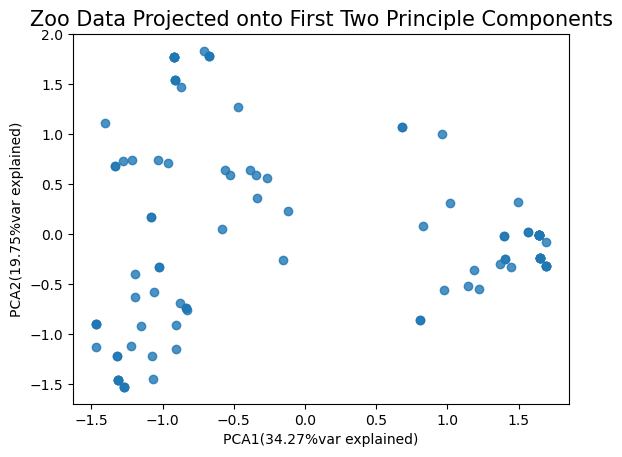

In [9]:
plt.plot(df_pca[:,0], df_pca[:,1], 'o', alpha = 0.8)
plt.xlabel(f"PCA1({pca.explained_variance_ratio_[0]:.2%}var explained)")
plt.ylabel(f"PCA2({pca.explained_variance_ratio_[1]:.2%}var explained)")
plt.title('Zoo Data Projected onto First Two Principle Components', fontsize = 15)

**Answer**

I can see two natural clusters in the data, distinct mainly across the first principle component. There is a cluster that falls to the right of zero on the PCA1 axis, and a cluster that falls to the left of zero on the PCA1 axis. Other than that, I can not see any distinct clustering. 

<!-- BEGIN QUESTION -->
<div class='exercise'><b>Q0.3 - Determining Optimal $k$</b></div>
Implement and visualize two different methods for determining the optimal number of clusters:

1. Plot the inertia vs $k$ for $k \in \{2,3,\dots,20\}$
2. Plot the average silhouette score vs $k$ for the same range

Choose and justify your optimal k based on these metrics. Discuss any differences between what the metrics suggest and whether one seems more reliable for this dataset.

In order to create a elbow plot and silhoutte score plot, I must first conduct the K Means algorithm.

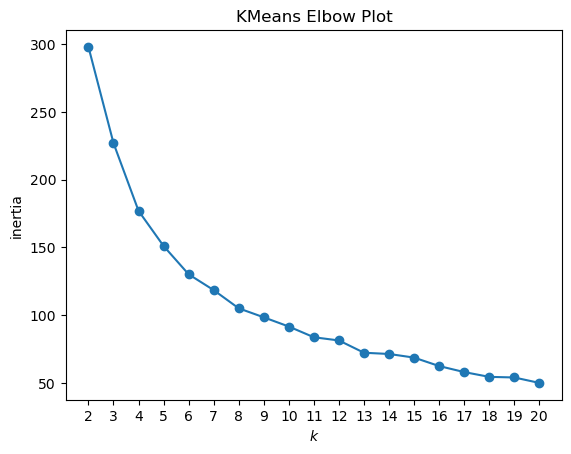

In [10]:
# your code here
ks = list(range(2,21))
best_inertias = []
for k in ks:
    kmeans = KMeans(n_clusters=k, init='random', n_init=50, random_state=109)
    kmeans.fit(df_normalized)
    # intertia = kmeans.inertia_
    # k_inertia_list.append(inertia)
    best_inertias.append(kmeans.inertia_)
    # best_inertias = [kmeans(df_pca, k, best_only=True)]


plt.plot(ks, best_inertias,'o-')
plt.xticks(ks);
plt.xlabel('$k$')
plt.ylabel('inertia')
plt.title('KMeans Elbow Plot');

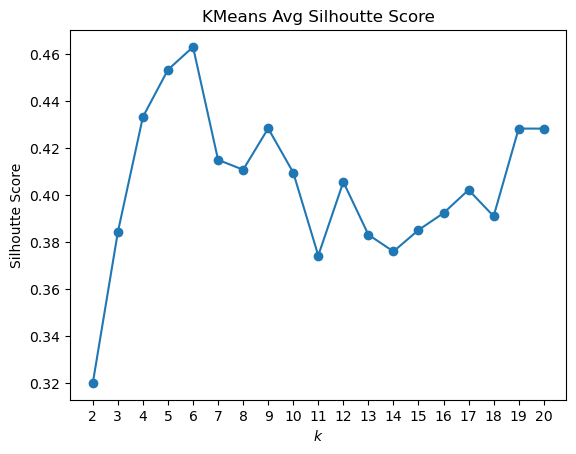

In [11]:
from sklearn.metrics import silhouette_score
silhoutte_list = []

for k in ks:
    kmeans = KMeans(n_clusters=k, init='random', n_init=50, random_state=109)
    #silhoutte score automatically takes the average
    silhoutte_score = silhouette_score(df_normalized, kmeans.fit_predict(df_normalized))
    silhoutte_list.append(silhoutte_score)
    
plt.plot(ks, silhoutte_list,'o-')
plt.xticks(ks);
plt.xlabel('$k$')
plt.ylabel('Silhoutte Score')
plt.title('KMeans Avg Silhoutte Score');
    
    


**Answer**

The optimal k I would choose based on these two graphs is k = 6. I belive the silhoutte score plot provides the strongest argument for this choice. I want to choose the highest silhoutte score possible -- without sacrificing computational efficiency. The highest silhoutte score is k = 6, which is a relatively small k given that k goes up to as high as 20. Therefore, I believe this is a solid k to choose. 

Looking at the elbow plot with this information, I can comfortably justify my choice to choose k = 6 clusters. For the elbow plot, I want to choose the kink in the inertia graph (represents a significant decrease in marginal decrease in inertia as k increases). This occurs at k=8, and while the inertia (around 100) is higher than that of say, k = 13 (around 80), the marginal decrease in inertia as a function of k is greatest at k=6, then decreases after. 



<!-- BEGIN QUESTION -->
<div class='exercise'><b>Q0.4 - Cluster Analysis</b></div>

Using the results of fitting K-means with your choice of optimal $k$, create a visualization showing:
   - Your datapoints in the 2D PCA space
   - Points colored by cluster assignment
   - Each `animal_name` annotated on the plot near its corresponding point 

Finally, interpret your results:
   - How well-separated are your clusters?
   - Do the clusters align with biological classifications?
   - Do any points seem to have been assigned to the wrong cluster? You may not be able to tell from your plot alone and so you should investigate this issue using one of the metrics discussed in class.

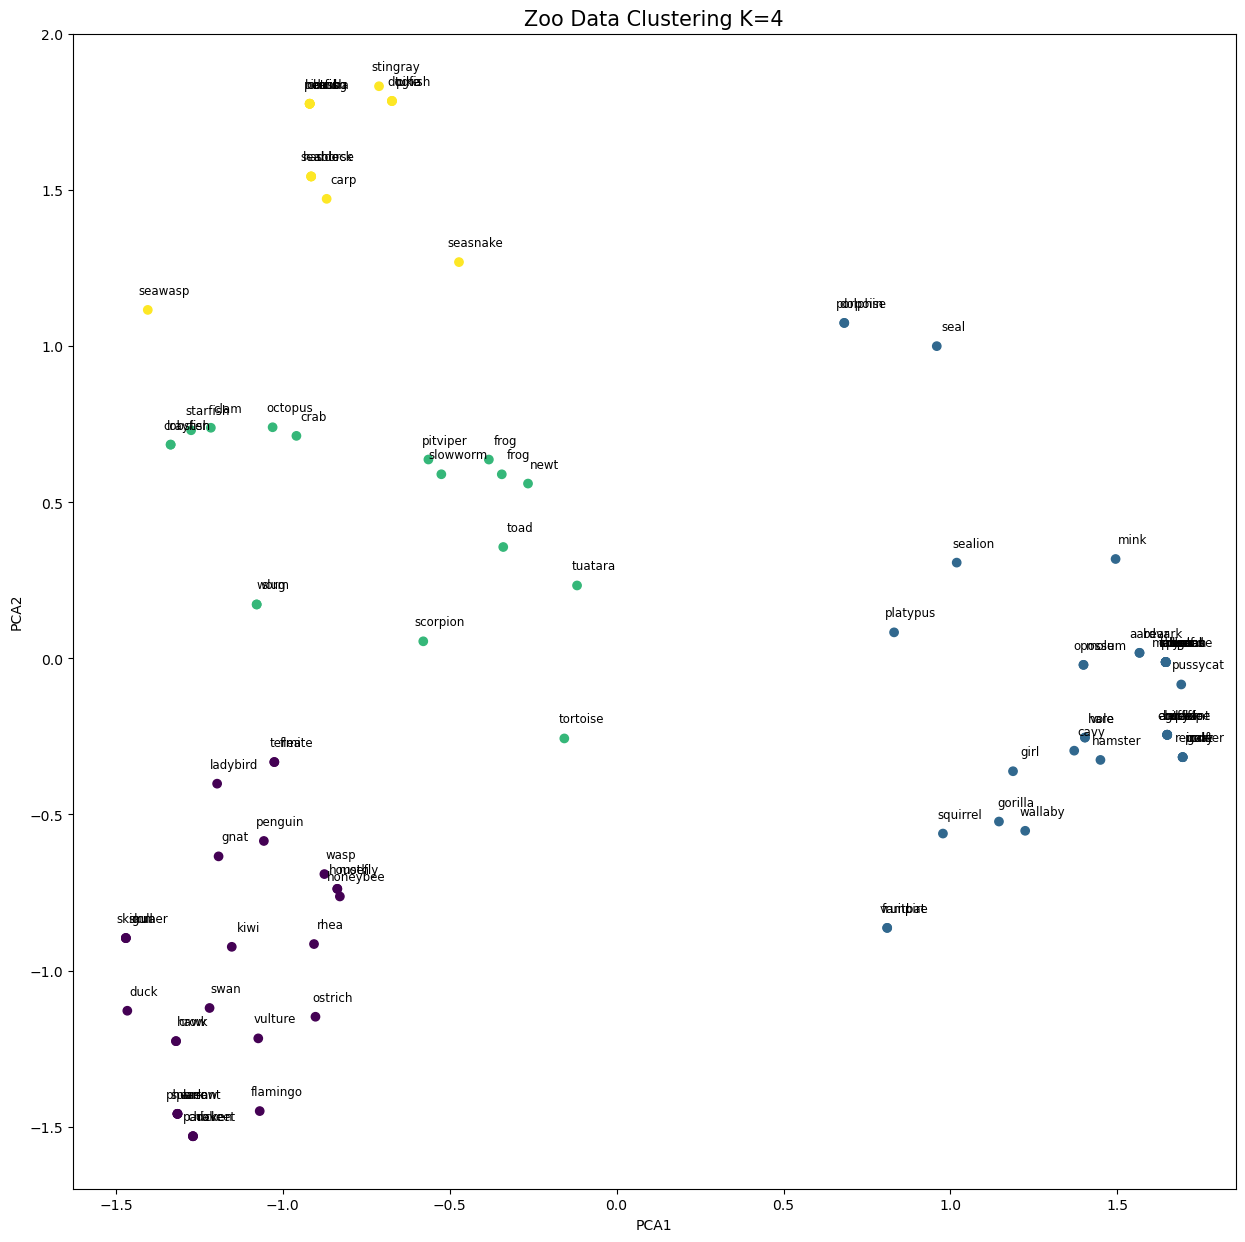

In [12]:
# your code here
#add animal_name to pca 
# df_pca['animal_name'] = df['animal_name'].values

#running kmeans algorithm
# your code here
#add animal_name to pca 
# df_pca['animal_name'] = df['animal_name'].values

#running kmeans algorithm
kmeans = KMeans(n_clusters=4, init='random', n_init=50, random_state=109)
kmeans.fit(df_pca)

#plotting kmeans pca 
#don't need .values because df_pca[:,0] is already a numpy array, not a dataframe
plt.figure(figsize=(15, 15))
plt.scatter(df_pca[:,0], df_pca[:,1], c=kmeans.labels_, label = '')

# plt.plot(df_pca[:,0], df_pca[:,1], 'o', alpha = 0.8)

#labelling the data points
#plt.annotate function

# Iterate through the data points
for i, (x, y) in enumerate(zip(df_pca[:,0], df_pca[:,1])):
    # You can perform operations on each data point here, 
    # such as highlighting it or adding a label.
    plt.annotate(df['animal_name'][i], (x, y), xytext=(x+0.05,y+0.05), ha='center', fontsize =8.5)
#labelling plot
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title('Zoo Data Clustering K=4', fontsize = 15)
plt.show()

**ANSWER**

My clusters are mildly well-separated. I can assert this because of the silhouette scores - where the average score is 0.44. This means that the average point in my data set is between being well-clustered and between clusters. 

Looking at the plot, I can see this assertion holding true. A few outlier points should belong to different clusters (specifically, the top left yellow clustered point). On the macro scale, I can see some sort of biological similarity in the clusters. 

The purple cluster seems to be winged animals of both bird (flamingos, ducks, kiwis) and insect (honeybee, gnat, wasp). There are a few animals, that if going off of this cluster's biological classification assumption, should not belong. For example the scorpion and tortoise points -- these are both not winged animals.

The blue cluster seems to be a mix of marsupials (wallaby), mammals (gorilla), and rodents (cavy). The one thing all of these animals have in common is that they have large amounts of fur and are essentially land animals. Which would then makes sense why the sealion and seal points are technically in between clusters, and the platypus point as well because although these animals have some fur, they spend their time in aquatic-based environments.

The yellow cluster seems to be aquatic based animals, either finned or not (carp, seasnake, stingray). 

The green cluster is also aquatic based based but have some interaction on land (penguin, toad, frog) -- which then makes sense why the platypus point is a bit between the blue and green clusters.

So honestly, my clusters are decently well paritioned and I feel great about this!


In [13]:
# Additional imports for Parts 1-4
import arviz as az
import pymc as pm
from scipy.special import expit

## Hierarchical Bayesian Models

## Dataset Information

### Contraceptive Usage by Bangladeshi Women

For this assignment, you are provided with datasets `train.csv` and `test.csv` which contain details of contraceptive usage among 1,934 Bangladeshi women.

There are four attributes for each woman along with a response variable, `contraceptive_use`, indicating if she uses contraceptives. The four attributes include:

* `district`: code identifying the district in which the woman lives (60 districts in total)
* `urban`: type of region of residence (binary)
* `living.children`: number of living children
* `age-mean`: age of the woman (in years, centered around mean)

The task is to build a classification model that can predict if a given woman uses contraceptives.

The following cell will load and inspect the train and test datasets.

TRAINING DATA INFO:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967 entries, 0 to 966
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   district           967 non-null    int64  
 1   urban              967 non-null    int64  
 2   living.children    967 non-null    int64  
 3   age_mean           967 non-null    float64
 4   contraceptive_use  967 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 37.9 KB

TEST DATA INFO:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967 entries, 0 to 966
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   district           967 non-null    int64  
 1   urban              967 non-null    int64  
 2   living.children    967 non-null    int64  
 3   age_mean           967 non-null    float64
 4   contraceptive_use  967 non-null    int64  
dtypes: float64(1), int64(4)
m

,district,urban,living.children,age_mean,contraceptive_use
0,35,0,4,2.4400,0
1,22,0,2,-1.5599,1
2,29,0,2,-8.5599,1


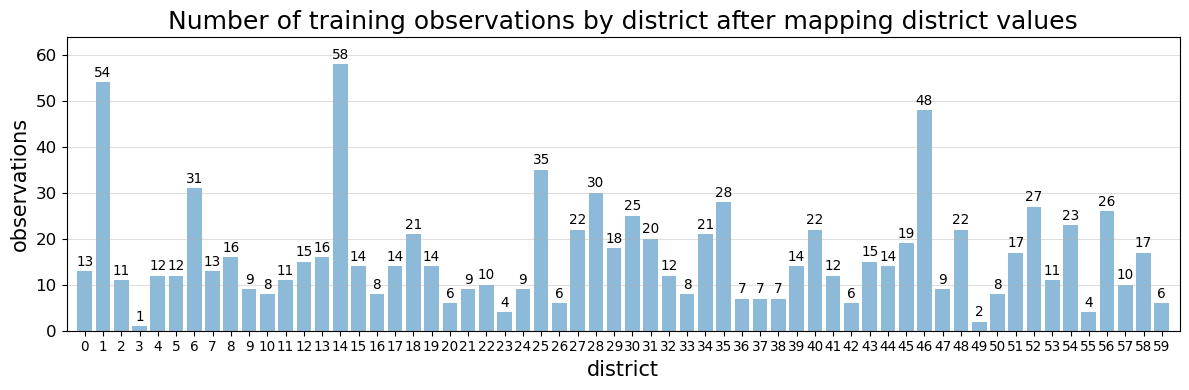

In [14]:
# loading and inspecting the data
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

# print dataset summary info for ease of reference
print("TRAINING DATA INFO:\n")
df_train.info()
print("\nTEST DATA INFO:\n")
df_test.info()
print("\nTRAINING DATA SUMMARY STATS:\n")
print(df_train.describe())
print("\nTRAINING DATA FIRST ROWS OF DATA:")
display(df_train.head(3))
print()

# And plot observation counts by district also just for reference
def plot_value_counts(value_counts, var_name, font_perc):
    """Generates barplot from pandas value_counts series"""
    fig, ax = plt.subplots(figsize=(12, 4))

    max_y = max(value_counts.values)
    n_cats = len(value_counts)

    ax.bar(range(n_cats), value_counts.values, alpha=0.5)

    for x, y in enumerate(value_counts):
        ax.text(
            x, y+max_y*.02,
            "{:,}".format(y),
            color="k",
            fontsize=14*font_perc,
            horizontalalignment="center"
        ) 

    ax.set_title(
        "Number of training observations by {} after mapping district values".format(
            var_name
        ),
        fontsize=18
    )
    ax.set_xlabel("{}".format(var_name), fontsize=15)
    ax.set_ylabel("observations", fontsize=15)
    ax.set_xticks(range(n_cats))
    ax.set_xticklabels(value_counts.index)
    ax.tick_params("x", labelsize=14*font_perc)
    ax.tick_params("y", labelsize=12)
    ax.set_ylim(top=max_y+(max_y*.1))

    ax.grid(":", axis="y", alpha=0.4)
    ax.margins(x=.01)
    plt.tight_layout()
    plt.show();

# plot and print summary of resulting district values
dist_counts = df_train["district"].value_counts().sort_index()

plot_value_counts(dist_counts, "district", .7)



## Bayesian Logistic Regression with Varying-Intercept Description


The first model we'd like to fit to the contraceptives data will be a **varying-intercept logistic regression** model, where the model's intercept varies by district.

Prior distributions:

$$
\begin{split}
\beta_{0j} &\sim N(\mu_0,\sigma_0^2)\; \text{, with} \;\; \mu_0 \sim N(0,10000)\; \text{and} \; \; \frac{1}{\sigma^2_0} \sim \text{Gamma}(0.1,0.1)
\\
\beta_1 &\sim N(0,10000) 
\\ \\ 
\beta_2 &\sim N(0,10000)
\\ \\ 
\beta_3 &\sim N(0,10000)
\\ \\
\end{split}
$$

Model for data:

$$
\begin{split}
Y_{ij} & \sim \text{Bernoulli}(p_{ij})
\\ \\
\text{logit}\:p_{ij} &= \beta_{0j} + \beta_1 \times \text{urban} + \beta_2 \times \text{living.children} + \beta_3 \times \text{age-mean}
\\ \\
\end{split}
$$

Where $Y_{ij}$ is 1 if woman $i$ in district $j$ uses contraceptives, and 0 otherwise, and where $i \in \{1,...,N\}$ and $j \in \{1,...,J\}$. $N$ is the number of observations in the data, and $J$ is the number of districts. The above notation assumes $N(\mu, \sigma^2)$ is a Normal distribution with mean $\mu$ and variance $\sigma^2$.

**PLEASE NOTE:** The $\text{Gamma}$ distribution cited above, uses the $\text{Gamma}(\alpha, \beta)$ parametrization, where $\alpha$ is the shape and $\beta$ is the rate.  

<a id="part1"></a>

### <div class='exercise'>Part 1: Varying-Intercept Model (Simulated Response Variable)</div> 

[Return to contents](#contents)

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q1.1 - Simulate Response</b></div>

To verify that PyMC can indeed recover the hidden parameter values, we'll simulate values of the response variable, `contraceptive_use`, for observations in the training set using the 4 predictors and *hard-coded model parameters of our choosing*. Then, using this simulated data, we'll check if PyMC can get back the parameter values that we hard-coded. If it does, we'll have some reason to believe that it can recover the hidden parameter values that generated the *real* data.

**Note: Synthetic response values generated using the parameters below will only be used in question 1.1 - 1.4**.

Generate $Y$ using the training data and the following hard-coded values:

$$
\begin{split}
\mu_0 &= 0.5
\\ \\
\sigma^2_0 &= 0.3
\\ \\
\beta_{0j} &\sim N(\mu_0,\sigma_0^2) \; \text{for all sixty districts}
\\ \\
\beta_1 &= 1
\\ \\ 
\beta_2 &= -0.5
\\ \\
\beta_3 &= -0.3
\\ \\
\end{split}
$$

Save your simulated values in a numpy array called `simulated_Y`.

**Verify that these parameters generate data in which an average of 48% to 50% of subjects use contraceptives.**

In [15]:
# set seed for consistency across runs

np.random.seed(109)
# your code here
...

B0 = np.random.normal(loc = 0.5, scale = np.sqrt(0.3), size = 60)

#each district should have own unique B0 value, create a mapping


districts = df_train['district'].values
# B0[districts]
# # Step 2: Create a mapping from district ID to B0 value
# district_to_B0 = dict(zip(unique_districts, B0))

# # Step 3: Assign B0 to each row in df_train based on its district
# B0 = df_train['district'].map(district_to_B0)


B1 = 1
B2 = -0.5
B3 = -0.3
X1 = df_train['urban']
X2 = df_train['living.children']
X3 = df_train['age_mean']

simulated_Y = expit(B0[districts] + B1*X1 + B2*X2 + B3*X3)
#sigmoid function = expit 
#turns linear equations 


In [16]:
# simulated_Y = simulated_Y*(-1)
#(1, rv simulated probability) 
simulated_Y = np.random.binomial(1, simulated_Y)


In [17]:
percent_change = np.mean(simulated_Y)
percent_change

0.49120992761116855

In [18]:
grader.check("q#1.1")

q#1.1 results: All test cases passed!

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q1.2 - Fit Varying-Intercept Model (Simulated Data)</b></div>

Create and fit the varying-intercept model specified above to your simulated data. Reasonably good convergence may require adjustments to the number of tuning samples and the target acceptance rate as suggested by any warnings from PyMC.

$$
\begin{split}
\beta_{0j} &\sim N(\mu_0,\sigma_0^2)\; \text{, with} \;\; \mu_0 \sim N(0,10000)\; \text{and} \; \; \frac{1}{\sigma^2_0} \sim \text{Gamma}(0.1,0.1)
\end{split}
$$

$$
\begin{split}
Y_{ij} & \sim \text{Bernoulli}(p_{ij})
\\ \\
\text{logit}\:p_{ij} &= \beta_{0j} + \beta_1 \times \text{urban} + \beta_2 \times \text{living.children} + \beta_3 \times \text{age-mean}
\\ \\
\end{split}
$$

In [19]:
with pm.Model() as pooled_model:
    # PRIORS
    # common priors
    mu_b0 = pm.Normal('u', mu=0, sigma = np.sqrt(10000))
    tau_0 = pm.Gamma("tau_0", alpha=0.1, beta=0.1)  # precision
    sigma_0 = pm.Deterministic("sigma_0", 1 / pm.math.sqrt(tau_0)) 
    
    b0 = pm.Normal('b0', mu=mu_b0, sigma= sigma_0, shape = 60)
    b1 = pm.Normal('b1', mu=0, sigma=np.sqrt(10000))
    b2 = pm.Normal('b2', mu=0, sigma=np.sqrt(10000))
    b3 = pm.Normal('b3', mu=0, sigma=np.sqrt(10000))

    # multiple continuous predictors
    X1 = df_train['urban'].values
    X2 = df_train['living.children'].values
    X3 = df_train['age_mean'].values
    
    # prior is the linear combination of features 
    logit_p = b0[districts] + b1*X1 + b2*X2 + b3*X3

    
    p = pm.math.sigmoid(logit_p)

    # likelihood function!
    Y = pm.Bernoulli("Y_obs", p=p, observed=simulated_Y)

    # sampling from CHATGPT
    trace_simulated_y = pm.sample(4000, tune=2000, target_accept=0.98, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [u, tau_0, b0, b1, b2, b3]


Sampling 4 chains for 2_000 tune and 4_000 draw iterations (8_000 + 16_000 draws total) took 53 seconds.


<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q1.3 - Convergence Diagnostics</b></div>

Plot the trace plots of the MCMC sampler for the parameters $\mu_0, \frac{1}{\sigma^2_0}\text{ (a.k.a., }\tau_0\text{)}, \beta_1, \beta_2, \beta_3$. Based on these and the R-hat values, does it look like the samplers converged? Explain your reasoning.


**Hint:** Use the Arviz `plot_trace()` function

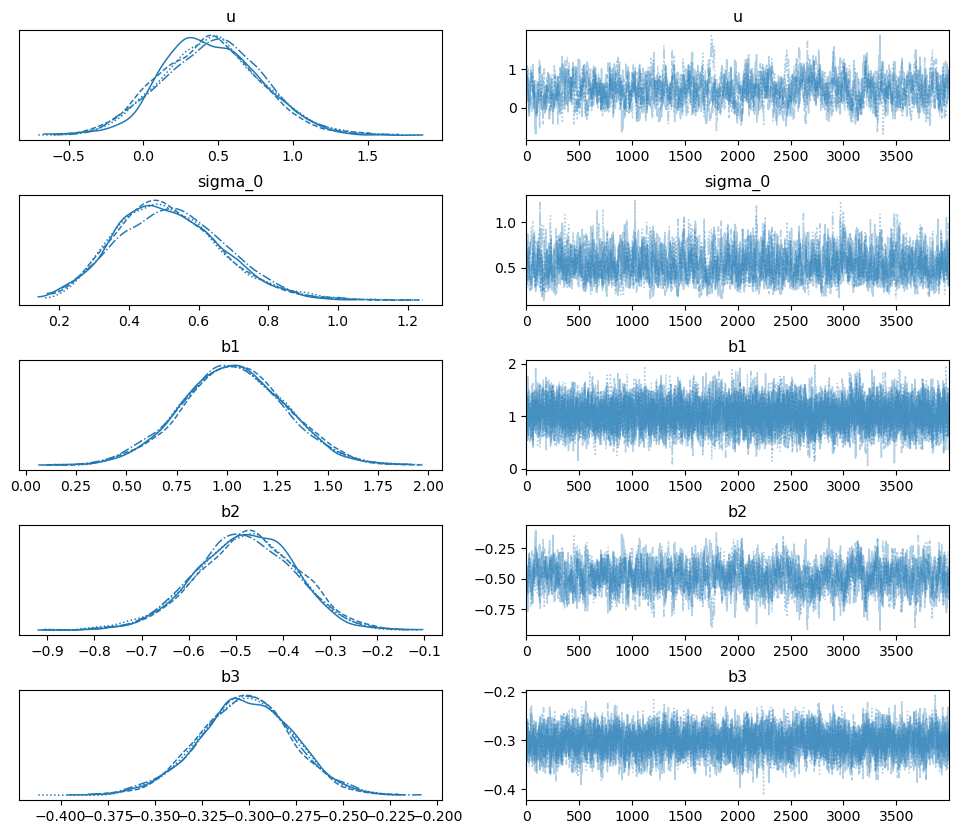

In [20]:
#QUESTION DO I ALSO PLOT B0


#create fig, ax objects to have spacing between subplots

#az plot trace function of the key parameters
az.plot_trace(trace_simulated_y, var_names = ["u", "sigma_0", "b1", "b2", "b3"])
plt.subplots_adjust(hspace=0.5)

In [21]:
#show summary statistics of the plots, including r_hat score
summary_df = az.summary(trace_simulated_y, var_names=["u", "sigma_0", "b1", "b2", "b3"])
summary_df

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
u,0.455,0.334,-0.147,1.098,0.013,0.009,681.0,1477.0,1.01
sigma_0,0.517,0.152,0.247,0.808,0.005,0.003,1036.0,1264.0,1.00
b1,1.033,0.255,0.550,1.509,0.004,0.003,4779.0,9500.0,1.00
b2,-0.480,0.106,-0.676,-0.282,0.004,0.003,790.0,1860.0,1.01
b3,-0.302,0.025,-0.348,-0.256,0.001,0.000,2115.0,5471.0,1.00


**ANSWER**

Clearly I can see that all the samples converged fairly quickly. The KDE plots are all unimodal with a large credible interval around the peak (which reflects great credibility in the true parameter value) and the sampling trajectory plots quickly stabilized around some central value (the same x value as the peak of the respective KDE plot). 

The r_hat indicates whether the Marjov chain was run long enough to reach convergence -- values near 1 indiciate convergence. Therefore, as all my r_hat scores are 1, the Markov chain was run long enough so the values converged.



<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q1.4 - Inspecting Posteriors</b></div>

Plot histograms of the posterior distributions for the parameters $\beta_{0,9}$, $\beta_{0,19}$, $\beta_{0,29}$, ..., $\beta_{0,59}$. Are the actual parameters that you generated contained within these posterior distributions?

**Hint: The `az.plot_posterior()` function might be helpful here.**

/shared/courseSharedFolders/142601outer/142601/cs109b/lib/python3.11/site-packages/arviz/plots/plot_utils.py:271: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (60) in plot_posterior, generating only 40 plots
  warnings.warn(


array([[<Axes: title={'center': 'b0\n0'}>,
        <Axes: title={'center': 'b0\n1'}>,
        <Axes: title={'center': 'b0\n2'}>,
        <Axes: title={'center': 'b0\n3'}>],
       [<Axes: title={'center': 'b0\n4'}>,
        <Axes: title={'center': 'b0\n5'}>,
        <Axes: title={'center': 'b0\n6'}>,
        <Axes: title={'center': 'b0\n7'}>],
       [<Axes: title={'center': 'b0\n8'}>,
        <Axes: title={'center': 'b0\n9'}>,
        <Axes: title={'center': 'b0\n10'}>,
        <Axes: title={'center': 'b0\n11'}>],
       [<Axes: title={'center': 'b0\n12'}>,
        <Axes: title={'center': 'b0\n13'}>,
        <Axes: title={'center': 'b0\n14'}>,
        <Axes: title={'center': 'b0\n15'}>],
       [<Axes: title={'center': 'b0\n16'}>,
        <Axes: title={'center': 'b0\n17'}>,
        <Axes: title={'center': 'b0\n18'}>,
        <Axes: title={'center': 'b0\n19'}>],
       [<Axes: title={'center': 'b0\n20'}>,
        <Axes: title={'center': 'b0\n21'}>,
        <Axes: title={'center': 'b0\n

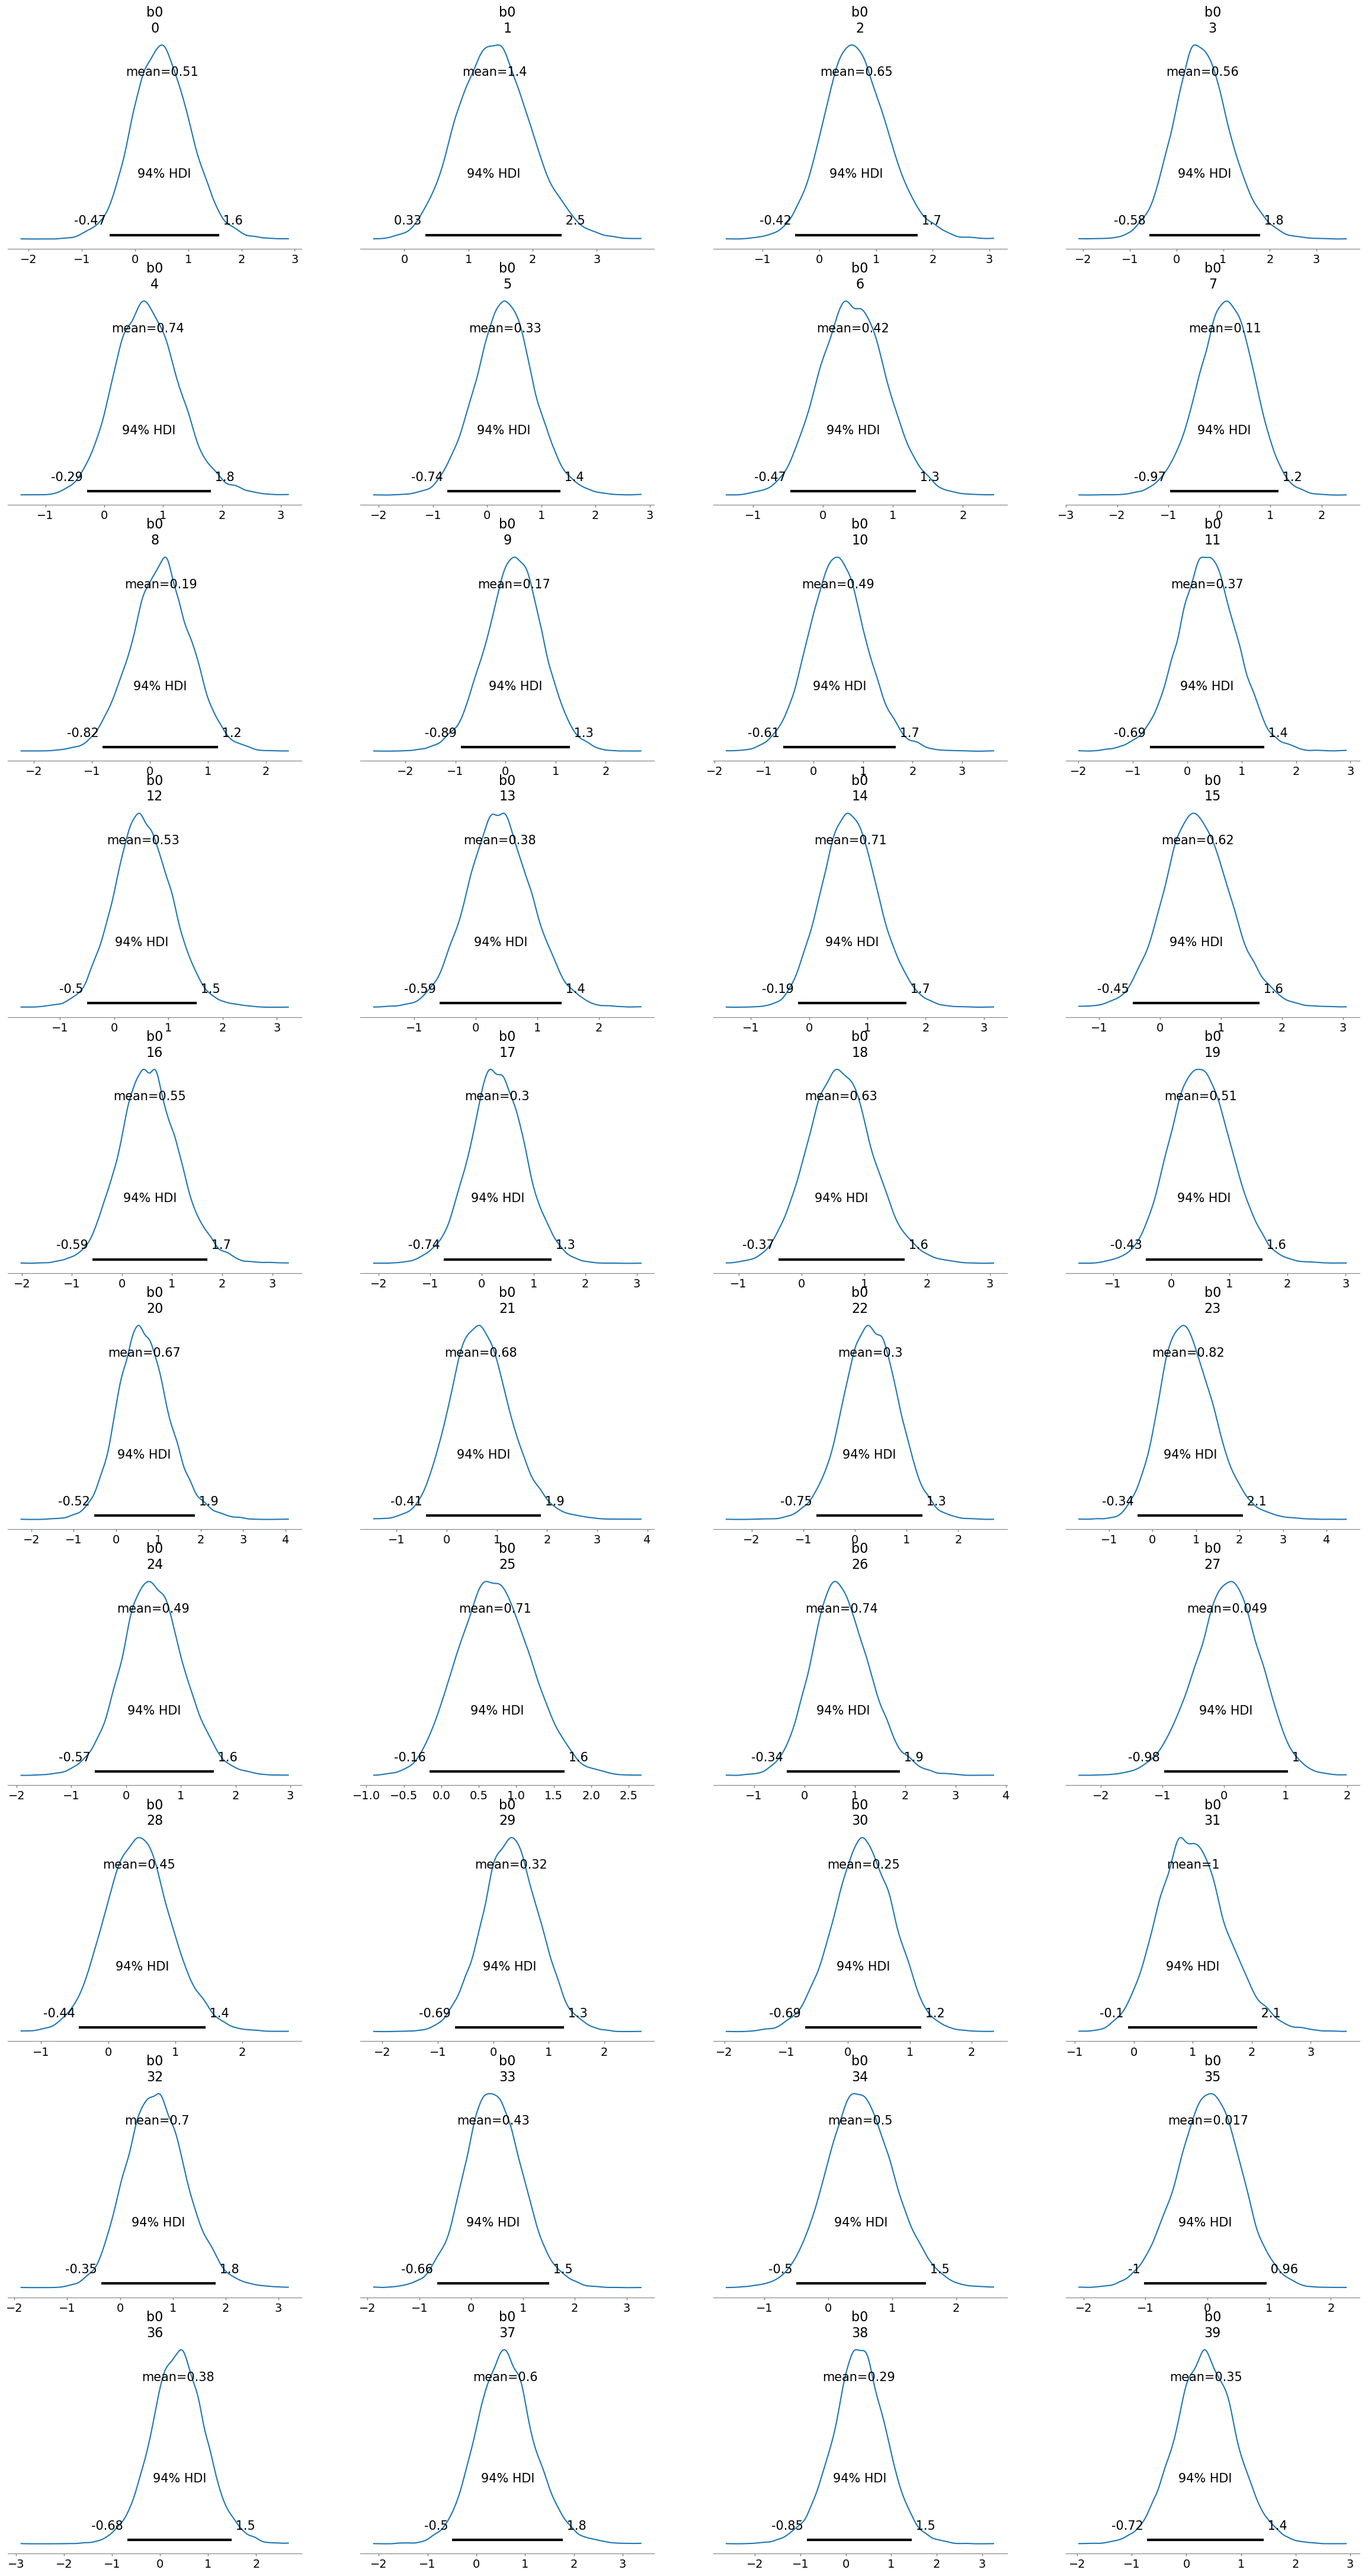

In [22]:
# your code here
az.plot_posterior(data = trace_simulated_y, var_names=["b0"])

$$
\begin{split}
\\ \\
\beta_{0j} &\sim N(\mu_0,\sigma_0^2) \; \text{for all sixty districts}
\\ \\
\end{split}
$$

**ANSWER**

Yes the 60 Beta values generated by my KDE plots all reflect a normal distribution with mean 0.5 and variance of 0.3. 
It is clear to see that all plots follow the normal distribution, and while there are a few outliers (in terms of having a mean 3x greater or less than 0.5), the overwhelming majority reflect a normal distribution with mean 0.5 and variance 0.3



<a id="part2"></a>
    
<!-- <div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA"> -->

### <div class='exercise'>Part 2: Varying-Intercept Model (Real Data)</div> 

[Return to contents](#contents)


<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q2.1 - Fit Varying-Intercept Model (Real Data)</b></div>

Now we'll fit our model to the *actual* data. Construct and fit the varying-intercept model to the real training data.

In [23]:
# your code here
with pm.Model() as varying_intercept_model:
    # PRIORS
    # common priors
    mu_b0 = pm.Normal('real_u', mu=0, sigma = np.sqrt(10000))
    tau_0 = pm.Gamma("real_tau_0", alpha=0.1, beta=0.1)  # precision
    sigma_0 = pm.Deterministic("real_sigma_0", 1 / pm.math.sqrt(tau_0)) 
    
    b0 = pm.Normal('real_b0', mu=mu_b0, sigma= sigma_0, shape = 60)
    b1 = pm.Normal('real_b1', mu=0, sigma=np.sqrt(10000))
    b2 = pm.Normal('real_b2', mu=0, sigma=np.sqrt(10000))
    b3 = pm.Normal('real_b3', mu=0, sigma=np.sqrt(10000))

    # multiple continuous predictors
    # X1 = df_train['urban'].values
    # X2 = df_train['living.children'].values
    # X3 = df_train['age_mean'].values
    
    districts = pm.Data('districts', df_train['district'], mutable = True)
    X1 = pm.Data('urban', df_train['urban'], mutable = True)
    X2 = pm.Data('living.children', df_train['living.children'], mutable = True)
    X3 = pm.Data('age', df_train['age_mean'], mutable = True)
    
    # prior is the linear combination of features 
    logit_p = b0[districts] + b1*X1 + b2*X2 + b3*X3

    
    p = pm.math.sigmoid(logit_p)

    # likelihood function!
    Y = pm.Bernoulli("Y_obs", p=p, observed=df_train['contraceptive_use'])

    # sampling from CHATGPT
    trace_varying_intercept = pm.sample(4000, tune=2000, target_accept=0.98, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [real_u, real_tau_0, real_b0, real_b1, real_b2, real_b3]


Sampling 4 chains for 2_000 tune and 4_000 draw iterations (8_000 + 16_000 draws total) took 51 seconds.


<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q2.2 - Convergence Diagnostics</b></div>

Check the convergence by examining the trace plots and R-hats, as you did with the simulated data. What do you observe?

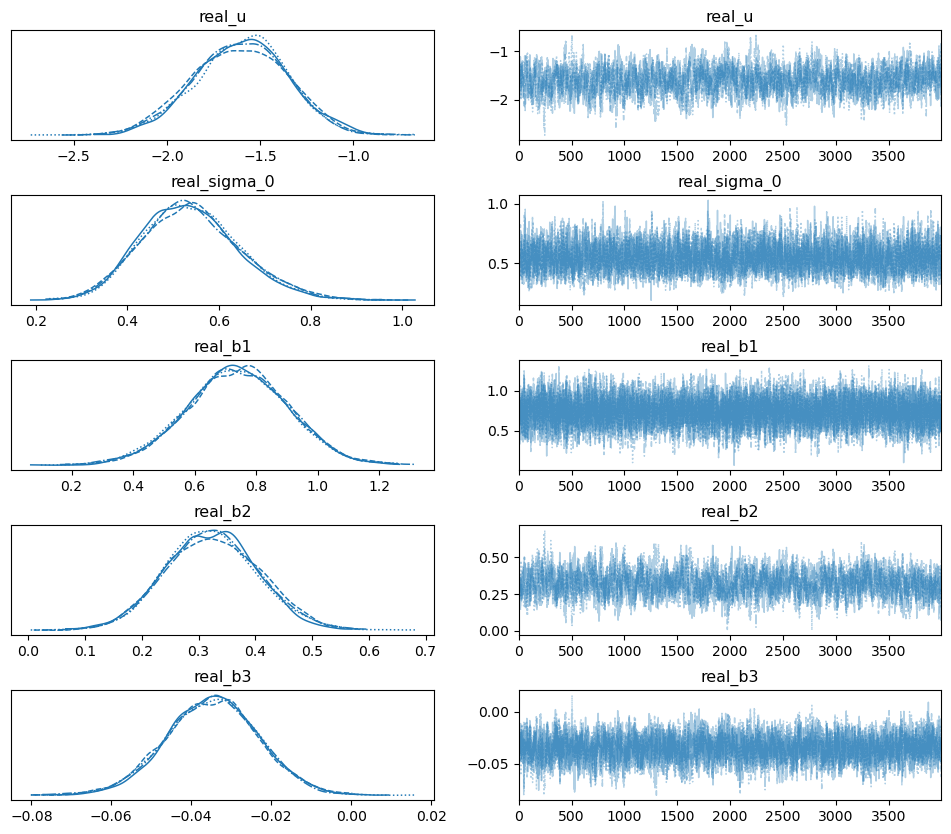

In [24]:
# your code here
# fig, ax = plt.subplots(figsize = (12,10))
az.plot_trace(trace_varying_intercept, var_names = ["real_u", "real_sigma_0", "real_b1", "real_b2", "real_b3"])
plt.subplots_adjust(hspace=0.5)

In [25]:
summary_real_y_df = az.summary(trace_varying_intercept, var_names=["real_u", "real_sigma_0", "real_b1", "real_b2", "real_b3"])
summary_real_y_df

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
real_u,-1.604,0.251,-2.078,-1.134,0.009,0.006,796.0,1876.0,1.0
real_sigma_0,0.539,0.107,0.343,0.743,0.002,0.001,3113.0,4826.0,1.0
real_b1,0.740,0.165,0.442,1.064,0.002,0.001,7086.0,10619.0,1.0
real_b2,0.323,0.081,0.167,0.470,0.003,0.002,833.0,1989.0,1.0
real_b3,-0.035,0.012,-0.056,-0.013,0.000,0.000,1559.0,4330.0,1.0


*Check the convergence by examining the trace plots and R-hats, as you did with the simulated data. What do you observe?*

**ANSWER**

I can see for our estimation of the true parameter values, the trace plots converged quickly. The sampling trajectory graphs for all parameters stabilized quickly around some central mean (the exact same value as the mean of the KDE plots). Looking at the KDE plots, they are all unimodal. Both of these facts lead me to have great belief that the true values of the parameters lie within that 95% credibility interval of mean of the KDE plot and that the central convergence line of the sampling trajectory plot 

The r_hat indicates whether the Marjov chain was run long enough to reach convergence -- values near 1 indiciate convergence. Therefore, as all my r_hat scores are 1, the Marrkov chain was run long enough so the values converged.

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q2.3 - Districts with Highest & Lowest Rates of Contraceptive Usage</b></div>

Based on the posterior means, which district has the highest base rate of contraceptive usage (independent of other factors like urban population)? Which district has the lowest? Explain how you arrived at these conclusions, interpreting any numerical values that played a role in your reasoning.

In [26]:
# your code here
#Step 1. I have to extract the posterior samples of b0 from the trace sampling
#using chatgpt I got 
posterior_samples = az.extract(trace_varying_intercept)

In [27]:
posterior_samples.real_b0
#So I can see that I have an 2D array of 16000 sampled B0 values across all the 60 districts
#so I want to have a dataframe that has each row represent a B0 for a distrcit, and each column is the 
#sampled B0 for that specific markov chain

<xarray.DataArray 'real_b0' (real_b0_dim_0: 60, sample: 16000)> Size: 8MB
array([[-1.3201399 , -2.30145562, -2.23241743, ..., -1.47373588,
        -1.76243418, -1.75655191],
       [-1.96676953, -1.90119956, -1.92306754, ..., -1.81122298,
        -1.97471451, -1.76719456],
       [-1.07180104, -1.70946798, -1.75891519, ..., -1.76061947,
        -2.46346725, -0.79005695],
       ...,
       [-1.49618737, -2.12034911, -2.16924202, ..., -1.95094941,
        -1.48736475, -1.88048747],
       [-1.18782345, -1.29041361, -1.30575754, ..., -1.87628009,
        -0.83692349, -1.61721495],
       [-1.75720248, -1.81029218, -1.71040884, ..., -2.26169212,
        -1.11971928, -1.75811972]])
Coordinates:
  * real_b0_dim_0  (real_b0_dim_0) int64 480B 0 1 2 3 4 5 ... 54 55 56 57 58 59
  * sample         (sample) object 128kB MultiIndex
  * chain          (sample) int64 128kB 0 0 0 0 0 0 0 0 0 ... 3 3 3 3 3 3 3 3 3
  * draw           (sample) int64 128kB 0 1 2 3 4 5 ... 3995 3996 3997 3998 3999

In [28]:
posterior_samples.real_b0.shape

(60, 16000)

In [29]:
# Compute mean of each b0 across all 16,000 samples
b0_means = posterior_samples.real_b0.mean(axis=1)
# Convert to a DataFrame to keep track of district indices
b0_means_df = pd.DataFrame({"b0_mean": b0_means})
#I want to sort the dataframe to show highest rates of contraceptive use and lowest
b0_means_sorted = b0_means_df.sort_values(by="b0_mean", ascending=False)


In [30]:
b0_means_sorted.head()

,b0_mean
56,-0.697326
34,-0.876736
46,-0.962871
43,-0.966156
16,-0.970132


In [31]:
b0_means_sorted.tail()

,b0_mean
27,-2.095635
10,-2.112767
1,-2.126159
28,-2.149193
11,-2.192753


$$
\begin{split}
Y_{ij} & \sim \text{Bernoulli}(p_{ij})
\\ \\
\text{logit}\:p_{ij} &= \beta_{0j} + \beta_1 \times \text{urban} + \beta_2 \times \text{living.children} + \beta_3 \times \text{age-mean}
\\ \\
\end{split}
$$

**ANSWER**

Essentially my logic was to take all the b0 values sampled across the markov chains for each district, and average them, then compare these mean values -- the reason I took the average because the parameter values converged quickly in the sampling trajectory plots, so the mean was a pretty good estimate of the true parameter value. 

SO in the above equation, I can see that the logit(p) function models the log odds of Y = 0 or Y=1. It transforms
this linear combination of beta values into a probability using the sigmoid function 1/ (1+e^-(B0+B1X1...)). In this case
the sigmoid would be P(Y=1) = 1/(1+e^-B0)

So if I think about it this way, a more negative B0 value would result in a greater denominator, which results in a lower probability that Y=1. 

Therefore, if I look at my dataframe, District 12 (bc the index starts at 0 not 1!), which has the most negative mean B0 value at -2.2 across the 16000 samples, would be the district with the lowest probability of contraceptive usage amongst all the districts.

On the other hand, District 57 has the least negative mean B0 value at -0.69 across the 16000 samples. This results in the highest probability Y=1 out of all the districts, which translates to District 57 being the district with the highest probability of contraceptive usage among all the districts. 



<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q2.4 - Varying Intercept? Conclusions from Posterior Samples</b></div>

What are the posterior means of $\mu_0$ and $\sigma_0$? Do these values offer any evidence in support of or against the varying-intercept model, compared to a model with a single intercept value for all districts? Explain why or why not.


**Hint:** Both ArviZ's `plot_posterior` and [`plot_forest()`](https://arviz-devs.github.io/arviz/api/generated/arviz.plot_forest.html) functions will prove useful here.

**interpreting the question**

The varying-intercept model is the model where each district has their own specific b_0 value (i.e this is an unpooled model, where the affect of some factors age or living children are roughly the same but there may be some within group differences affecting the outcome). 

The single intercept model is the model with a universal b_0 value for all districts (i.e this is a pooled model).

Essentially what I am looking to see is the variation in b_0 values (the sigma value itself):
if sigma is centered around 0, that suggests there is not much variation in the b_0 values which implies the within-district difference on contraceptive use isn't that important, and we can use a single intercept model.

If sigma is not centered around 0, by a substantial amount, then there is district specific affect on contraceptive use which implies a varying-intercept model may be best for this data.

Additionally, if I can see that for the mew (mean) graphs, the values are tightly centered around the mean, that suggests the intercepts all fall within that small of a range and again there's no big variation in district affect on contraceptive use. 

array([<Axes: title={'center': 'real_u'}>,
       <Axes: title={'center': 'real_sigma_0'}>], dtype=object)

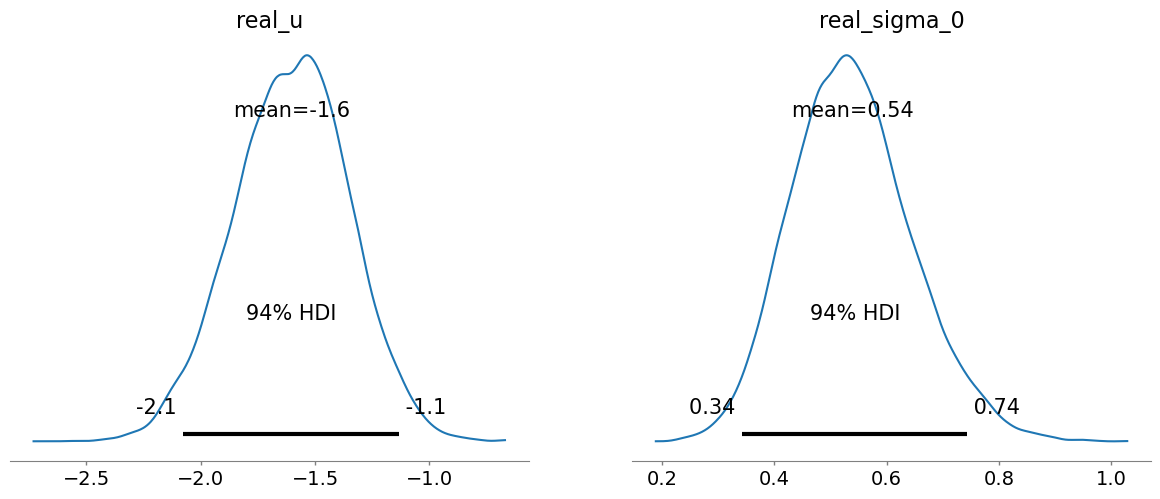

In [32]:
# your code here

az.plot_posterior(data = trace_varying_intercept, var_names=["real_u", "real_sigma_0"])


Essentially what I see with the posterior distribution of both the observed mean and variance of our intercept values is that the varying-intercept model is the correct model for the data. 

The posterior distribution of mew/mean (real_u) supports this fact because the 95% confidence interval (94% HDI) has a width/variance of 1, which is a large amount considering the observed average mew value is -1.6!! So there is quite a large difference amongst the b0 mew values, which points to the fact there are innate differences across districts in terms of contraceptive use due to the fact the districts are different. 

The posterior distribution of sigma/variance (real_sigma) also supports this fact because the variance is centered around 0.54. If the variance were centered around 0, that suggests there is not much variation in the b_0 values which implies the within-district difference on contraceptive use isn't that important, and we can use a single intercept model. HOWEVER, the variance is not centerd around 0, rather it is centered around 0.54. So there is district specific affect on contraceptive use which implies **a varying-intercept model may be best for this data**.


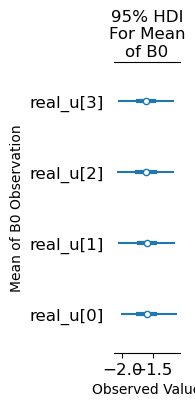

In [33]:
#chatGPT used for this forest plot because my y axis was cluttered w/ text. Need help
#with aesthetics of visualization ;?/

# Create a larger figure with better spacing
fig, ax = plt.subplots(figsize=(2, 4)) 
az.plot_forest(trace_varying_intercept, kind="forestplot", var_names=["real_u"], ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)  # Make labels bigger
plt.xticks(fontsize=12)  
plt.yticks(rotation=0)
plt.title("95% HDI For Mean of B0")
plt.ylabel("Mean of B0 Observation")
plt.xlabel("Observed Value")
# , "real_sigma_0", "real_b0"

plt.tight_layout()

plt.show()


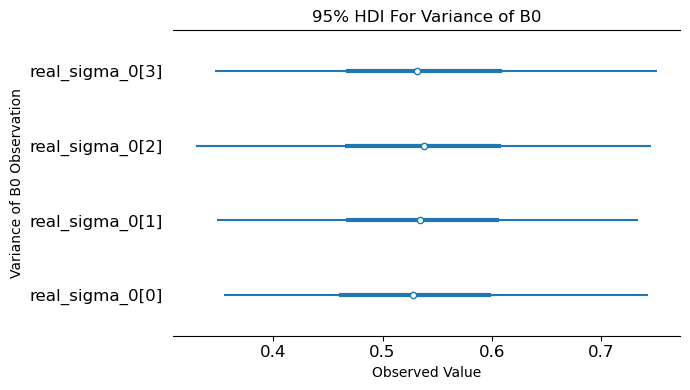

In [34]:
fig, ax = plt.subplots(figsize=(7, 4)) 
az.plot_forest(trace_varying_intercept, kind="forestplot", var_names=["real_sigma_0"], ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)  # Make labels bigger
plt.xticks(fontsize=12)  
plt.yticks(rotation=0)  
# , "real_sigma_0", "real_b0"
plt.title("95% HDI For Variance of B0")
plt.ylabel("Variance of B0 Observation")
plt.xlabel("Observed Value")

plt.tight_layout()

plt.show()

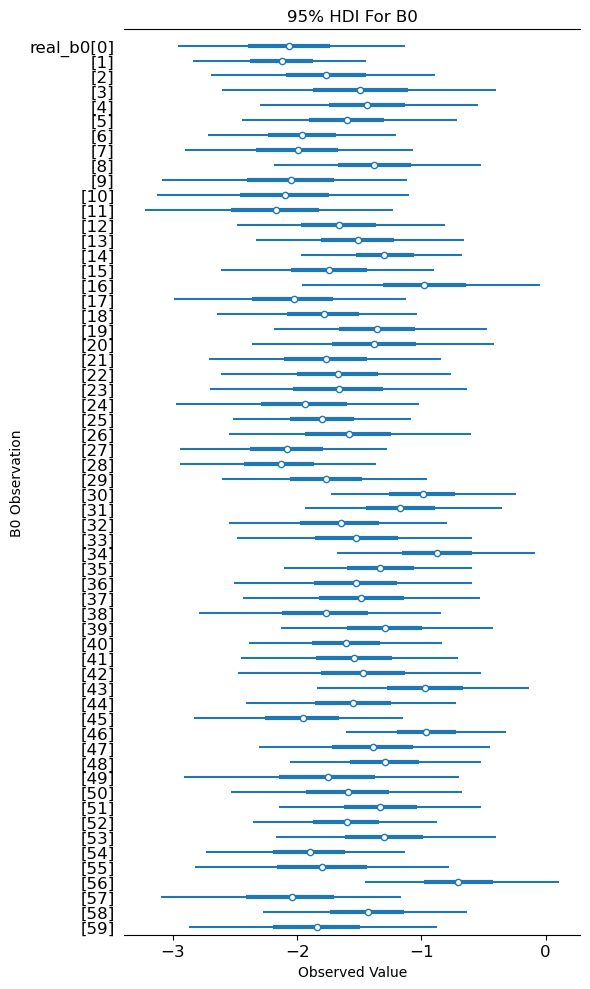

In [35]:
#chatGPT code to have a better HDI plot 
# extracting b_0 posterior values
real_b0_posterior = trace_varying_intercept.posterior["real_b0"]
#CHATGPT CODE
# Average over chains to avoid duplicate values per subject
real_b0_collapsed = real_b0_posterior.mean(dim="chain")  # Collapse chain dimension
inference_data = az.from_dict(posterior={"real_b0": real_b0_posterior})

fig, ax = plt.subplots(figsize=(6, 10))
# plt.figure(figsize = (10,8))
az.plot_forest(inference_data, var_names=["real_b0"], combined = True, ax=ax)

ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)  # Adjust label size
plt.xticks(fontsize=12)
plt.yticks(rotation=0)
plt.title("95% HDI For B0")
plt.ylabel("B0 Observation")
plt.xlabel("Observed Value")
plt.tight_layout()
plt.show()


**ANSWER**

What I can see from the forest plots is literrally the exact same takeaway from the posterior distribution plots. Another interesting thing to look at is the forest plot of the beta values (this jumbled up mess right above). The white dots represent the true b0 value observed for that district -- we can see there is a crazy amount of variation which suggests again that **a varying intercept model is the best model for this data**.

<a id="part3"></a>
    
<!-- <div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA"> -->

## <div class='exercise'>Part 3: Varying-Coefficient Model</div> 

[Return to contents](#contents)


The next model we will fit to the contraceptives data is a **varying-coefficients logistic regression** model. Here, in addition to a varying intercept, the coefficients on `living.children`, `age_mean`, and `urban` also vary by district.

Prior distribution:

$$
\begin{split}
\beta_{0j} &\sim N(\mu_0,\sigma_0^2)\; \text{, with} \;\; \mu_0 \sim N(0,10000)\; \text{and} \; \; \frac{1}{\sigma^2_0} \sim \text{Gamma}(0.1,0.1)
\\
\beta_{1j} &\sim N(0,\sigma_1^2)\; \text{, with} \;\; \frac{1}{\sigma^2_1} \sim \text{Gamma}(0.1,0.1) 
\\
\beta_{2j} &\sim N(0,\sigma_2^2)\; \text{, with} \;\; \frac{1}{\sigma^2_2} \sim \text{Gamma}(0.1,0.1)
\\ 
\beta_{3j} &\sim N(0,\sigma_3^2)\; \text{, with} \;\; \frac{1}{\sigma^2_3} \sim \text{Gamma}(0.1,0.1)
\\
\end{split}
$$

Model for data:

$$
\begin{split}
Y_{ij} &\sim \text{Bernoulli}(p_{ij})
\\ \\
\text{logit}\:p_{ij} &= \beta_{0j} + \beta_{1j} \times \text{urban} + \beta_{2j} \times \text{living.children} + \beta_{3j} \times \text{age-mean}
\\ \\
\end{split}
$$

**PLEASE NOTE:**

* The name "varying coefficient model" is used here to distinguish the Q3 model from the "varying intercept" model in Q2, but observe from the specification about that **BOTH** intercepts *and* coefficients vary in this Q3 model.
* Once again, the $\text{Gamma}$ distribution uses the $\text{Gamma}(\alpha, \beta)$ parametrization, where $\alpha$ is the shape and $\beta$ is the rate. 

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q3.1 - Fit Varying Coefficient Model</b></div>

Fit the varying-coefficients model described above to the real training data.

In [36]:
# your code here
with pm.Model() as varying_coefficient_model:
    #common priors for b0 u and sigma
    mu_b0 = pm.Normal('u', mu=0, sigma = np.sqrt(10000))
    tau_0 = pm.Gamma('tau_0', alpha = 0.1, beta = 0.1)
    # sigma_squared = 1/pm.Gamma('precision_sigma_squared', alpha = 0.1, beta = 0.1)
    sigma_0 = pm.Deterministic("sigma_0", 1/pm.math.sqrt(tau_0))

    tau_1 = pm.Gamma('tau_1', alpha = 0.1, beta = 0.1)
    # sigma_squared = 1/pm.Gamma('precision_sigma_squared', alpha = 0.1, beta = 0.1)
    sigma_1 = pm.Deterministic("sigma_1", 1/pm.math.sqrt(tau_1))

    tau_2 = pm.Gamma('tau_2', alpha = 0.1, beta = 0.1)
    sigma_2 = pm.Deterministic("sigma_2", 1/pm.math.sqrt(tau_2))

    tau_3 = pm.Gamma('tau_3', alpha = 0.1, beta = 0.1)
    sigma_3 = pm.Deterministic("sigma_3", 1/pm.math.sqrt(tau_3))
                               

    #common priors for b0, b1, b2, b3
    b0 = pm.Normal('posterior_b0', mu = mu_b0, sigma = sigma_0, shape=60)
    b1 = pm.Normal('posterior_b1', mu = 0, sigma = sigma_1, shape=60)
    b2 = pm.Normal('posterior_b2', mu = 0, sigma = sigma_2, shape=60)
    b3 = pm.Normal('posterior_b3', mu = 0, sigma = sigma_3, shape=60)
    
    # multiple continuous predictors 
    # X1 = df_train['urban'].values
    # X2 = df_train['living.children'].values
    # X3 = df_train['age_mean'].values

    districts = pm.Data('districts', df_train['district'], mutable = True)
    X1 = pm.Data('urban', df_train['urban'], mutable = True)
    X2 = pm.Data('living.children', df_train['living.children'], mutable = True)
    X3 = pm.Data('age', df_train['age_mean'], mutable = True)
    
    
    # logit (log odds) is the linear combination of features, this time all are varying amongst the districts
    logit_p = b0[districts] + b1[districts]*X1 + b2[districts]*X2 + b3[districts]*X3
    #sigmoid converts the log odds into a number between 0 and 1 (probability)
    p = pm.math.sigmoid(logit_p)

    # likelihood function!
    Y = pm.Bernoulli("Y_obs_coefficient", p=p, observed=df_train['contraceptive_use'])

    # sampling from CHATGPT
    trace_varying_coefficient = pm.sample(4000, tune=2000, target_accept=0.98, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [u, tau_0, tau_1, tau_2, tau_3, posterior_b0, posterior_b1, posterior_b2, posterior_b3]


Sampling 4 chains for 2_000 tune and 4_000 draw iterations (8_000 + 16_000 draws total) took 111 seconds.


<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q3.2 - Convergence Diagnostics</b></div>

Check the convergence of your varying-coefficients model by examining the trace plots and R-hats, as you did with the varying-intercept models earlier. What do you observe?

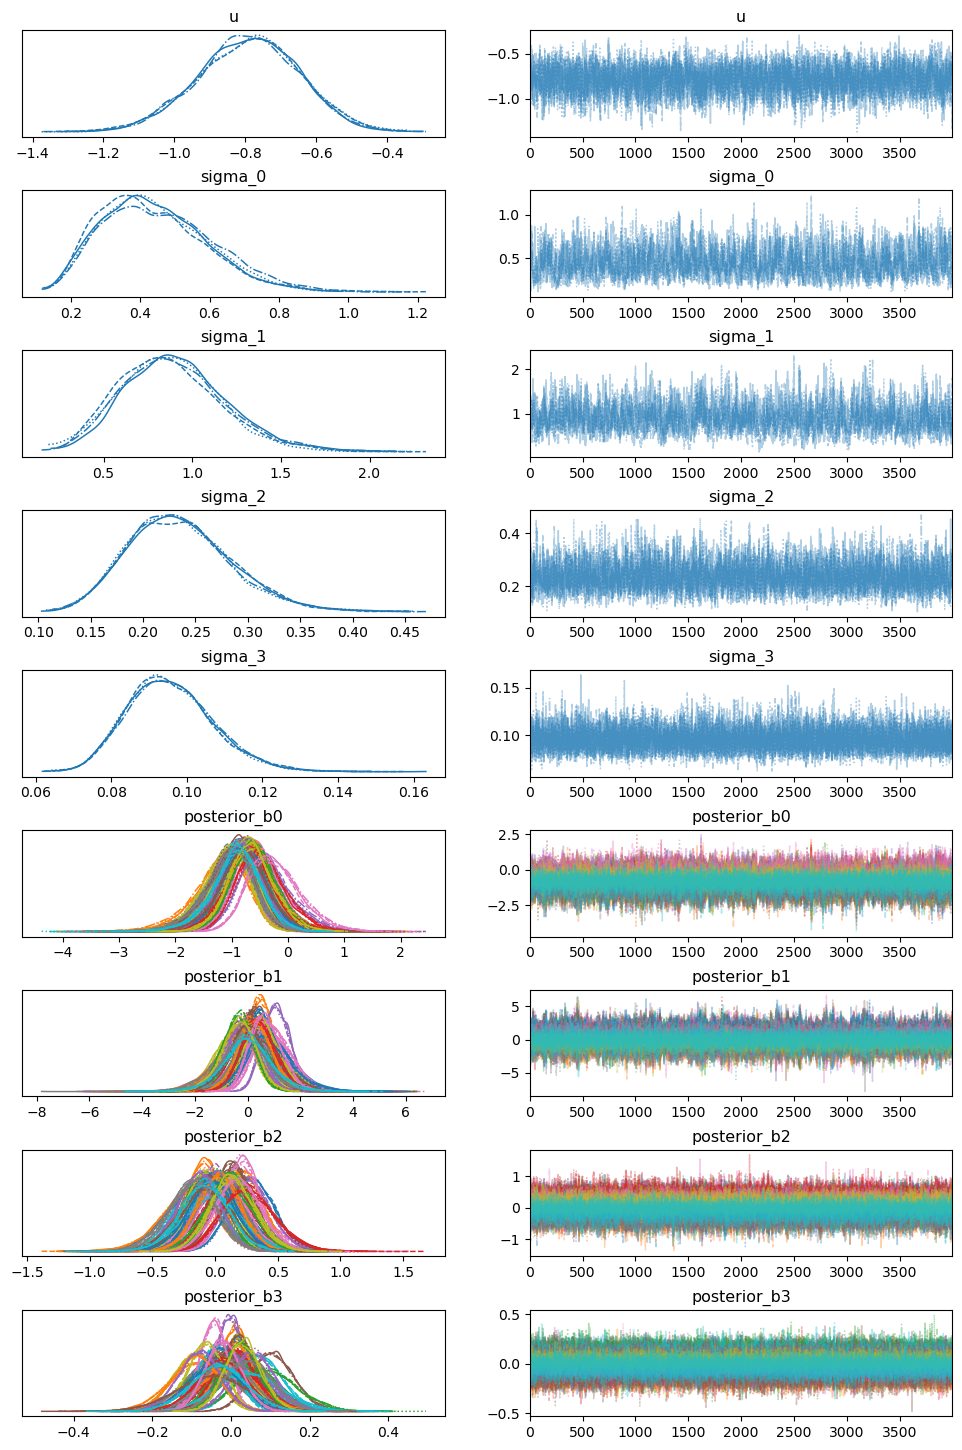

In [37]:
# your code here
az.plot_trace(trace_varying_coefficient, var_names = ["u", "sigma_0",
                                                      "sigma_1",
                                                      "sigma_2",
                                                      "sigma_3",
                                                      "posterior_b0", "posterior_b1", "posterior_b2", "posterior_b3"])
plt.subplots_adjust(hspace=0.5)

In [38]:
r_hat_df = az.summary(trace_varying_coefficient, var_names= ["u", "sigma_0",
                                                      "sigma_1",
                                                      "sigma_2",
                                                      "sigma_3",
                                                      "posterior_b0", "posterior_b1", "posterior_b2", "posterior_b3"])
r_hat_df

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
u,-0.790,0.144,-1.059,-0.521,0.002,0.002,3492.0,6326.0,1.00
sigma_0,0.444,0.152,0.179,0.715,0.005,0.003,1026.0,2390.0,1.00
sigma_1,0.891,0.291,0.361,1.430,0.009,0.007,920.0,1256.0,1.01
sigma_2,0.235,0.049,0.147,0.330,0.001,0.001,3218.0,5774.0,1.00
sigma_3,0.096,0.011,0.075,0.117,0.000,0.000,11685.0,10758.0,1.00
...,...,...,...,...,...,...,...,...,...
posterior_b3[55],-0.047,0.091,-0.219,0.125,0.001,0.001,26567.0,12101.0,1.00
posterior_b3[56],-0.020,0.046,-0.106,0.066,0.000,0.000,19502.0,11853.0,1.00
posterior_b3[57],0.042,0.065,-0.081,0.160,0.000,0.000,22342.0,12773.0,1.00
posterior_b3[58],0.031,0.047,-0.056,0.121,0.000,0.000,24982.0,12074.0,1.00


**Thought Process**
There are 242 rows in this r_hat_df. What I want to do is slice the df into the posterior distributions for each
beta value for each specific destrict (so get a size 60x1 df for posterior b3 r hat values)
and then I will check the value counts for r hat scores to determine convergence across the markov sampling
for each beta value

In [39]:
b0_r_hat_df = r_hat_df.iloc[5:65, -1]
b0_r_hat_df.tail()

posterior_b0[55]    1.0
posterior_b0[56]    1.0
posterior_b0[57]    1.0
posterior_b0[58]    1.0
posterior_b0[59]    1.0
Name: r_hat, dtype: float64

In [40]:
b0_r_hat_df.value_counts()

r_hat
1.0    60
Name: count, dtype: int64

In [41]:
b1_r_hat_df = r_hat_df.iloc[65:124, -1]
b1_r_hat_df.head()


posterior_b1[0]    1.0
posterior_b1[1]    1.0
posterior_b1[2]    1.0
posterior_b1[3]    1.0
posterior_b1[4]    1.0
Name: r_hat, dtype: float64

In [42]:
b1_r_hat_df.value_counts()

r_hat
1.0    59
Name: count, dtype: int64

In [43]:
b2_r_hat_df = r_hat_df.iloc[125:184, -1]
b2_r_hat_df.head()

posterior_b2[0]    1.0
posterior_b2[1]    1.0
posterior_b2[2]    1.0
posterior_b2[3]    1.0
posterior_b2[4]    1.0
Name: r_hat, dtype: float64

In [44]:
b2_r_hat_df.value_counts()

r_hat
1.0    59
Name: count, dtype: int64

In [45]:
b3_r_hat_df = r_hat_df.iloc[185:245, -1]
b3_r_hat_df.head()

posterior_b3[0]    1.0
posterior_b3[1]    1.0
posterior_b3[2]    1.0
posterior_b3[3]    1.0
posterior_b3[4]    1.0
Name: r_hat, dtype: float64

In [46]:
b3_r_hat_df.value_counts()

r_hat
1.0    60
Name: count, dtype: int64

Check the convergence of your varying-coefficients model by examining the trace plots and R-hats, as you did with the varying-intercept models earlier. What do you observe?

**ANSWER**
First starting with the r_hat scores -- I can see that from all the dataframes I created, the trace plots for each beta value converged every single time because all of the r_hat scores = 1. Which means that the followings estimations of beta values (and also the mean and variance of b0) are accurate and close to the true parameter values.

I can certainly see trends in the updated posterior distribution plots, or KDE plots. 

Starting with the mew/mean of beta 0, I see a unimodal posterior distribution with relatively tight centering around -0.8. This to me suggests that the varying intercept is not a good model in this case, because the estimation of the average b0 value across the 60 districts is roughly the same. However, if I look at the variance KDE plot for b0 (sigma_0), it kind of shifts my thinking because I would expect the variance to be centered around 0 due to what I observed in the KDE plot. However, the variance is not centered around 0. Instead, the variance is right skewed with a bulk of the variance being between 0.6 and 1. This to me suggests that the b0 values differ quite a bit across districts, which again points to the varying-intercept model being better for this data than the single-intercept model. 

Continuing off of this, and adding more confusion, the updated posterior distribution for b0 itself is unimodal. And honestly the 95% HDI looks pretty tight -- the mean of beta 0 seems to be -0.7 and the 95% HDI falls between -1 and -0.4. So actually, I will say that because of this, the varying-intercept model is not better than the single-intercept model, and we should use a single-intercept model because that is what the unimodal updated beta 0 posterior distribution tells us.

Moving onto beta 1, I can see a more unimodal than not posterior with some centering around 0 which suggests that the single coefficient model for b1 may be a better model than the varying coefficient model -- I mean there is definitely some variation (more so than b0 posterior). However, there isn't as much variation within the updated b1 values so much so that points to specific X1 feature affects across districts. The peaks of the different posterior samples for each district in b1 are relatively close to 0. So this points to a larger pooled or common effect for X1 feature across districts.

Moving on to beta 2, I can see a large variance in the posterior distribution for beta 2 values across districts which to me signifies that there is indeed a different specific influence the amount of living children has on each district in terms of their contraceptive use. Therefore, a varying-beta 2 coefficient makes a lot of sense to use and accurately describes the relationship in the data.

Moving on to beta 3, I can see the clearest discrepancy and largest variance between estimated mew (mean) values for each district in this KDE plot. The estimated mews are all spread out. There is no unimodal trend. This points to the fact a varying-beta 3 coefficient accurately describes the relationship in the data.

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q3.3 - Distribution of Posterior Means & HDIs</b></div>

Plot the distributions of posterior means and the 95% highest posterior density intervals (HDIs) for the intercepts and coefficients for each district. What do you conclude from these graphs?

**HINT:** The ArviZ [`plot_forest()`](https://arviz-devs.github.io/arviz/api/generated/arviz.plot_forest.html) function is very well-suited for this task.

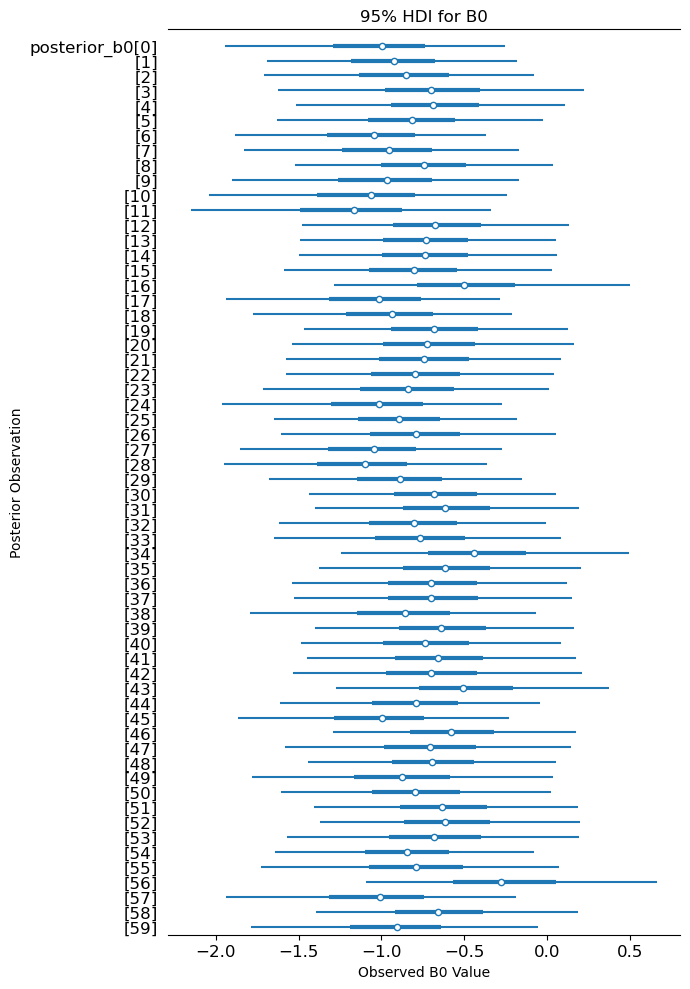

In [47]:
# your code here
fig, ax = plt.subplots(figsize=(7, 10)) 
az.plot_forest(trace_varying_coefficient, combined = True, var_names=["posterior_b0"], ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)  # Make labels bigger
plt.xticks(fontsize=12)  
plt.yticks(rotation=0)  
plt.title("95% HDI for B0")
plt.ylabel("Posterior Observation")
plt.xlabel("Observed B0 Value")
# , "real_sigma_0", "real_b0"

plt.tight_layout()

plt.show()

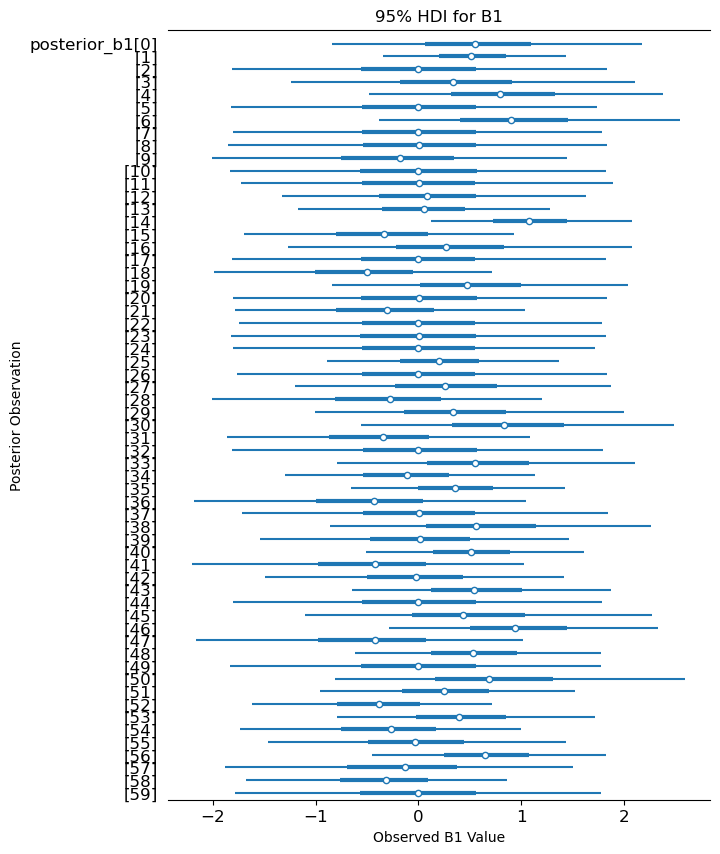

In [48]:
fig, ax = plt.subplots(figsize=(7, 10)) 
az.plot_forest(trace_varying_coefficient, combined = True, var_names=["posterior_b1"], ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)  # Make labels bigger
plt.xticks(fontsize=12)  
plt.yticks(rotation=0)  
plt.title("95% HDI for B1")
plt.ylabel("Posterior Observation")
plt.xlabel("Observed B1 Value")
# , "real_sigma_0", "real_b0"

# plt.tight_layout()

plt.show()

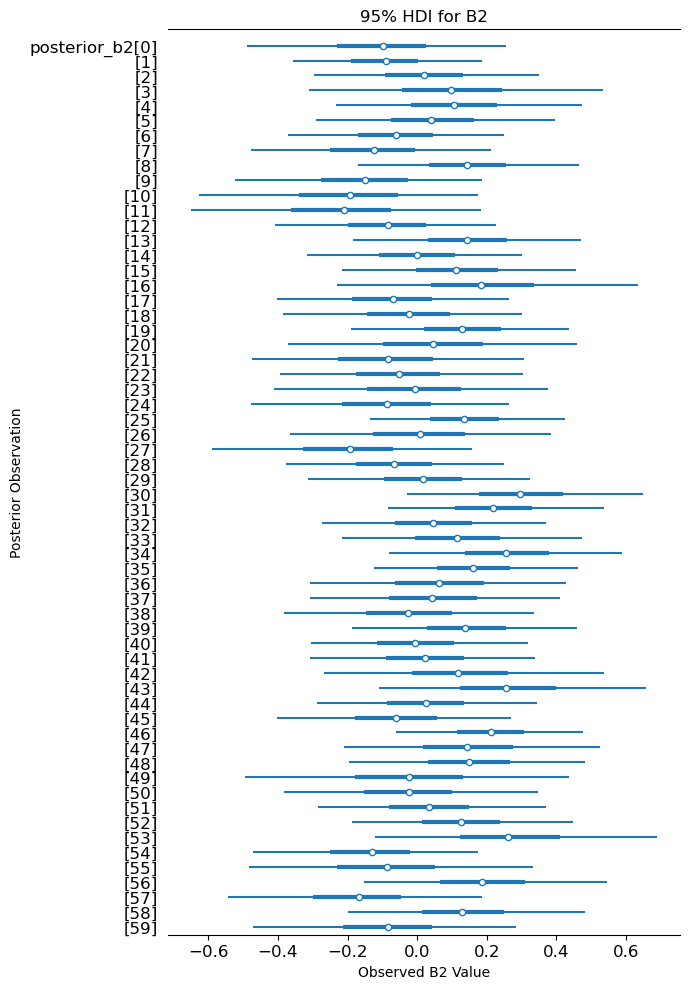

In [49]:
fig, ax = plt.subplots(figsize=(7, 10)) 
az.plot_forest(trace_varying_coefficient, combined = True, var_names=["posterior_b2"], ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)  # Make labels bigger
plt.xticks(fontsize=12)  
plt.yticks(rotation=0)  
plt.title("95% HDI for B2")
plt.ylabel("Posterior Observation")
plt.xlabel("Observed B2 Value")
# , "real_sigma_0", "real_b0"

plt.tight_layout()

plt.show()

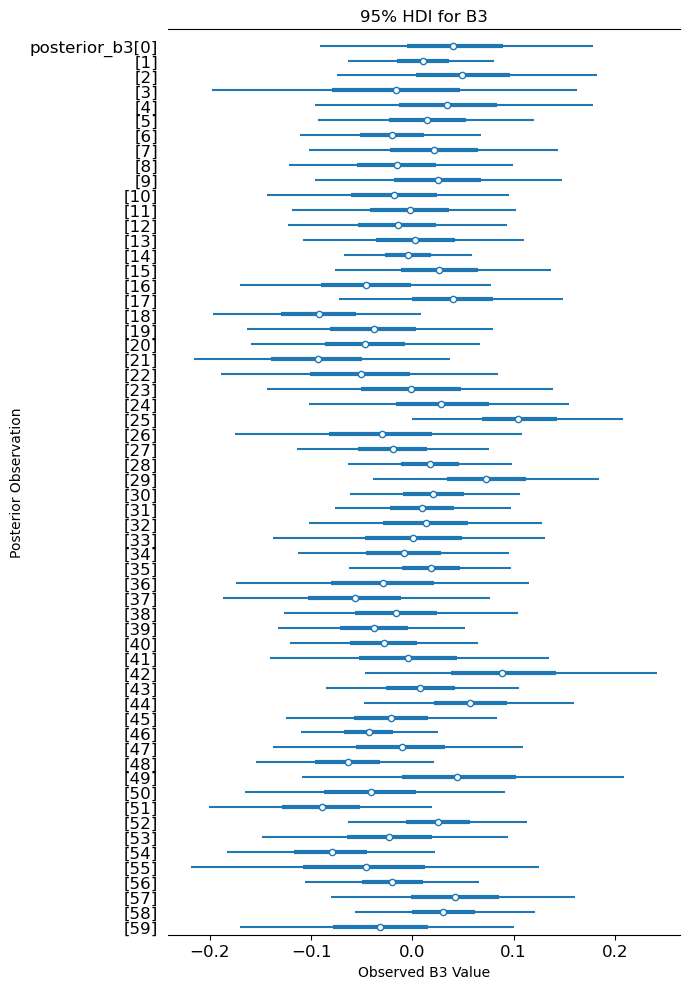

In [50]:
fig, ax = plt.subplots(figsize=(7, 10)) 
az.plot_forest(trace_varying_coefficient, combined = True, var_names=["posterior_b3"], ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)  # Make labels bigger
plt.xticks(fontsize=12)  
plt.yticks(rotation=0)  
plt.title("95% HDI for B3")
plt.ylabel("Posterior Observation")
plt.xlabel("Observed B3 Value")
# , "real_sigma_0", "real_b0"

plt.tight_layout()

plt.show()

*Plot the distributions of posterior means and the 95% highest posterior density intervals (HDIs) for the intercepts and coefficients for each district. What do you conclude from these graphs?*

**ANSWER**
The 95% HDI plots confirm my assertions that B0 and B1 are best modelled with a single-intercept model because the points are mostly centered around a single value (vertical line on the x axis).

They also confirm my assertions that B2 and B3 are best modelled with a varying-intercept model because the points are not centered around any value and are instead spread out with large variance. 

<a id="part4"></a>
    
<!-- <div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA"> -->

## <div class='exercise'>Part 4: Predictions & Model Selection</div> 

[Return to contents](#contents)

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.1 - Model Evaluation & Comparison</b></div>

Now that we’ve fit varying-intercept and varying-coefficient models we will evaluate their predictive performance and compare them to a naive baseline.
 
First, sample from the posterior predictive distribution using `pm.sample_posterior_predictive()`, generating predictions for both models on the train and test sets.

Next, compute the accuracy and percentage of predictions classified as `1` for each model on both train and test.

Finally, compute the train and test accuracy of a naive model that predicts the most common class in the training set for all inputs.

In [51]:
# sample posterior predictive for the train and test sets
with varying_intercept_model:  #use correct model, in this case varying_intercept_model
    #for the training data, I will be sampling from each posterior distribution of the parameters, 
    #plugging them into the likelihood function, and pulling out the obtained Y
    #chatGPT explanation: you're NOT re-estimating parameters—instead, you're generating new samples of 𝑌 based on posterior distributions
    #here Y_obs is the df_train[] Y values
    intercept_train_pred = pm.sample_posterior_predictive(trace_varying_intercept,
                                                    var_names=['Y_obs'],
                                                    return_inferencedata=True,
                                                    predictions=True,
                                                    extend_inferencedata=False)
    # intercept_train_pred = intercept_train.posterior_predictive['Y_obs'].values
    #how to make predictions using sample posterior predictive
    # prediction_sample = pm.sample_posterior_predictive(
    #     trace,
    #     var_names=["response_variable"],
    #     return_inferencedata=True,
    #     predictions=True,
    #     extend_inferencedata=False
    # )
    pm.set_data({'districts':df_test['district'], 'urban': df_test['urban'], 'age':df_test['age_mean'], 'living.children': df_test['living.children']})
    intercept_test_pred = pm.sample_posterior_predictive(trace_varying_intercept,
                                                   var_names=['Y_obs'],
                                                    return_inferencedata=True,
                                                    predictions=True,
                                                    extend_inferencedata=False)
    # intercept_test_pred = intercept_test.posterior_predictive['Y_obs'].values
    #for the test dataset, we actually do not have these observed y values, we are trying to predict them with the testing data
    #using the sampled parameter values from the training step! 

Sampling: [Y_obs]


Sampling: [Y_obs]


In [52]:
with varying_coefficient_model:
    coeff_train_pred = pm.sample_posterior_predictive(trace_varying_coefficient,
                                                    var_names=['Y_obs_coefficient'],
                                                    return_inferencedata=True,
                                                    predictions=True,
                                                    extend_inferencedata=False)
    pm.set_data({'districts':df_test['district'], 'urban':df_test['urban'], 'age':df_test['age_mean'], 'living.children':df_test['living.children']})

    coeff_test_pred = pm.sample_posterior_predictive(trace_varying_coefficient,
                                                   var_names=['Y_obs_coefficient'],
                                                    return_inferencedata=True,
                                                    predictions=True,
                                                    extend_inferencedata=False)

Sampling: [Y_obs_coefficient]


Sampling: [Y_obs_coefficient]


In [53]:
# coeff_test_pred.to_numpy
# type(coeff_test_pred)

In [54]:
#TEST DATA Y VALUES
Y_true = df_test['contraceptive_use']

In [55]:
#INTERCEPT TRAIN PREDICTIONS 
intercept_train_probs = intercept_train_pred['predictions']['Y_obs'].mean(dim=['chain','draw'])
intercept_train_pred = (intercept_train_probs > 0.5).astype(int)


In [56]:
intercept_model_y_test_probs = intercept_test_pred['predictions']['Y_obs'].mean(dim=['chain','draw'])
#simulated_Y = np.random.binomial(1, simulated_Y)

In [57]:
#INTERCEPT MODEL TEST PREDICTIONS
y_intercept_model_test_pred = (intercept_model_y_test_probs > 0.5).astype(int)

In [58]:
#Y INTERCEPT TRRAIN ACCURACY
(Y_true == intercept_train_pred).mean()

0.5408479834539814

In [59]:
#INTERCEPT TEST ACCURACY
(Y_true == y_intercept_model_test_pred).mean()

0.655635987590486

In [60]:
#Building Coefficient Model Train Predictions
coefficient_train_probs = coeff_train_pred['predictions']['Y_obs_coefficient'].mean(dim=['chain','draw'])
coefficient_train_pred = (coefficient_train_probs > 0.5).astype(int)

#Building Coefficient Model Test Predictions
coefficient_test_probs = coeff_test_pred['predictions']['Y_obs_coefficient'].mean(dim=['chain','draw'])
coefficient_test_pred = (coefficient_test_probs > 0.5).astype(int)


In [61]:
(Y_true == coefficient_train_pred).mean()

0.5387797311271976

In [62]:
(Y_true == coefficient_test_pred).mean()

0.6204756980351603

In [63]:
#building Naive Model
majority_class = (df_test["contraceptive_use"].mean() > 0.5).astype(int)
naive_model_pred = np.full(len(df_test["contraceptive_use"]), majority_class)

In [64]:
#testing Naive Model
(Y_true == naive_model_pred).mean()

0.6049638055842813

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.2 - Model Selection</b></div>

What do you conclude from the results of 4.1? Which model appears to be the best (i.e. varying-intercept, varying-coefficient, or naive), and what is your rationale?

**ANSWER**

The best model (in terms of generalizing and fitting unseen data) is the varying_intercept_test model which had an accuracy of 0.65 (or 65%) on the unobserved contraceptive use data. This is followed by my coefficient_test model with an accuracy of 0.619 (61.9%). However, the the rest of my models performed worse than the naive model, which had an accuracy of 0.60 (or 60)% on that same data. This is disappointing because it feels like I put so much work in to create this model and all I needed to do was just create an array of 1's and I still would have predicted better :?( 

With this I conclude that the best model ought to be the varying intercept model -- because it performed the best out of all the other models and we do know that there is a true effect of the district on contraceptive use (we saw this earlier in the pset on Question 2).

A strong rationale to use this model over the naive model is that from the ethical point of view, just predicting contraceptive use (or anything for that matter) off of the the class that appeared the most is a dangerous and unethical choice that could lead to some dangerous outcomes. One, there is no structured rationale for someone receiving the proper treatment or care for contraceptive use other than "a majority of other people take contraceptives so you probably do as well". Secondly, if people found out this was the way that they were being prescribed care (essentially, other people do this so you probably do as well), I feel there would be outrage or disgust. It would seem there was less effort put in to predicting patient outcomes and caring for the patient, compared to a varying intercept model. And even if the varying intercept model only slightly outperforms the naive model, I think the effort and care combined with the increased performance are more than enough to qualify the varying intercept model as the best model. 

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.3 Wrap-up</b></div>

* In a few sentences, please describe the aspect(s) of the assignment you found most challenging. This could be conceptual and/or related to coding and implementation.

* How many hours did you spend working on this assignment? Store this as an int or float in `time_spent_on_hw`

* 

**ANSWER**

The most challenging aspect of this pset was certainly question 4.1. It took me so long to use pm.sample_predictive to generate the predictions, However what was most challengign was the fact that the TFs had no idea how to use the function! It was not in the solution. So we were told to use this function while the teaching staff did not implement it in the solutions!

In [78]:
time_spent_on_hw = 15

In [79]:
grader.check("q4.3")

q4.3 results: All test cases passed!

In [80]:
time_end = time.time()
print(f"It took {(time_end - time_start)/60:.2f} minutes for this notebook to run")

It took 19.67 minutes for this notebook to run


**This concludes HW1. Thank you!** 🌈